In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import polars as pl
import pandas as pd
from tabulate import tabulate
from tqdm.notebook import tqdm as tqdm_notebook
import numpy as np
import os
import threading

debug = False

GRIB (General Regularly-distributed Information in Binary form) 

In [3]:
data_folder = 'D:\\Svago\\deep-weather-forecasting\\Data\\2023'

In [4]:
grib_files = []
for file in os.listdir(data_folder):
    if file.endswith(".grib"):
        grib_files.append(os.path.join(data_folder, file))

print(f"Number of grib files: {len(grib_files)}")

Number of grib files: 12


## Test

In [5]:
file = grib_files[11]

In [6]:
# Open the file
grib = xr.open_dataset(file, filter_by_keys={'numberOfPoints': 104661,'dataType': 'an'}, chunks=None, cache=True)

Can't read index file 'D:\\Svago\\deep-weather-forecasting\\Data\\2023\\December 2023.grib.5b7b6.idx'
Traceback (most recent call last):
  File "c:\ProgramData\miniconda3\Lib\site-packages\cfgrib\messages.py", line 550, in from_indexpath_or_filestream
    self = cls.from_indexpath(indexpath)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\miniconda3\Lib\site-packages\cfgrib\messages.py", line 429, in from_indexpath
    index = pickle.load(file)
            ^^^^^^^^^^^^^^^^^
_pickle.UnpicklingError: invalid load key, '\x00'.


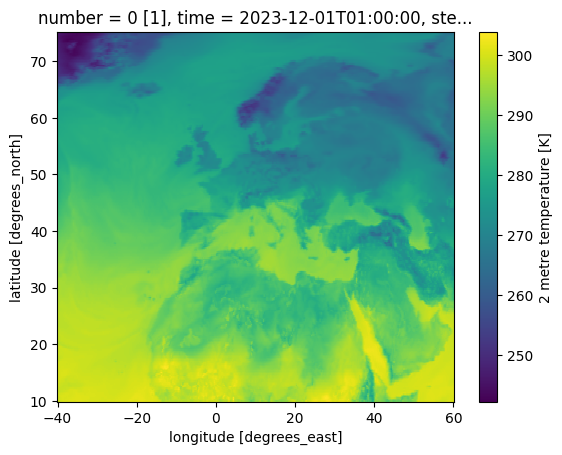

In [7]:
grib["t2m"].isel(time=1).plot()
plt.show()

In [8]:
grib

<xarray.Dataset> Size: 6GB
Dimensions:              (time: 744, latitude: 261, longitude: 401)
Coordinates:
    number               int32 4B ...
  * time                 (time) datetime64[ns] 6kB 2023-12-01 ... 2023-12-31T...
    step                 timedelta64[ns] 8B ...
    surface              float64 8B ...
  * latitude             (latitude) float64 2kB 75.0 74.75 74.5 ... 10.25 10.0
  * longitude            (longitude) float64 3kB -40.0 -39.75 ... 59.75 60.0
    valid_time           (time) datetime64[ns] 6kB ...
    depthBelowLandLayer  float64 8B ...
    entireAtmosphere     float64 8B ...
Data variables: (12/20)
    u10                  (time, latitude, longitude) float32 311MB ...
    v10                  (time, latitude, longitude) float32 311MB ...
    t2m                  (time, latitude, longitude) float32 311MB ...
    sp                   (time, latitude, longitude) float32 311MB ...
    skt                  (time, latitude, longitude) float32 311MB ...
    u100                 (time, latitude, longitude) float32 311MB ...
    ...                   ...
    tsn                  (time, latitude, longitude) float32 311MB ...
    stl4                 (time, latitude, longitude) float32 311MB ...
    slt                  (time, latitude, longitude) float32 311MB ...
    vike                 (time, latitude, longitude) float32 311MB ...
    vipile               (time, latitude, longitude) float32 311MB ...
    cape                 (time, latitude, longitude) float32 311MB ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-10-24T10:30 GRIB to CDM+CF via cfgrib-0.9.1...

For each xarray.Dataset (representing a month), we can iterate through the dataset using its three primary keys: "time", "latitude", and "longitude"

The code to iterate the keys:
```python
for coord in grib.coords:
    print(f"Coordinate: {coord}")

for var in grib.variables:
    print(f"Variable: {var}")
```

u10 =         "10m_u_component_of_wind"
v10 =         "10m_v_component_of_wind"
t2m =         "2m_temperature"
sp  =         "surface_pressure"
skt =         "skin_temperature"
u100 =        "100m_u_component_of_wind",
v100 =        "100m_v_component_of_wind",
 hcc       "high_cloud_cover",
 lcc       "low_cloud_cover",
 mcc        "medium_cloud_cover",
tcc    "total_cloud_cover",
tciw   "total_column_cloud_ice_water",
tclw     "total_column_cloud_liquid_water",
rsn     
tsn      
depthBelowLandLayer
stl4     "soil_temperature_level_4"
slt     "soil_type"
entireAtmosphere
vike         "vertical_integral_of_kinetic_energy",
vipile        "vertical_integral_of_potential_internal_and_latent_energy",
cape         "convective_available_potential_energy",
       
    

In [9]:
for var in grib.variables:
    print(var)


number
time
step
surface
latitude
longitude
valid_time
u10
v10
t2m
sp
skt
u100
v100
hcc
lcc
mcc
tcc
tciw
tclw
rsn
tsn
depthBelowLandLayer
stl4
slt
entireAtmosphere
vike
vipile
cape


## Converting the data

In [10]:
month_nparray = np.zeros((len(grib.time), len(grib.latitude), len(grib.longitude), len(grib.variables)))
month_nparray.shape

(744, 261, 401, 29)

In [11]:
# stampo tutti i valori di time
len(grib.valid_time)

744

In [12]:
grib.isel(time=314).to_array()

<xarray.DataArray (variable: 20, latitude: 261, longitude: 401)> Size: 8MB
array([[[ 2.5030518e+00,  2.6007080e+00,  2.7667236e+00, ...,
          4.6251221e+00,  4.3946533e+00,  4.4259033e+00],
        [ 1.6387939e+00,  1.9122314e+00,  2.1876221e+00, ...,
          3.0880127e+00,  3.3067627e+00,  3.5255127e+00],
        [ 8.0969238e-01,  1.0880127e+00,  1.3673096e+00, ...,
          3.6749268e+00,  3.8966064e+00,  4.1163330e+00],
        ...,
        [-5.4559326e+00, -5.1551514e+00, -4.9197998e+00, ...,
         -6.0721436e+00, -6.4432373e+00, -6.7147217e+00],
        [-5.4295654e+00, -5.1492920e+00, -5.0067139e+00, ...,
         -6.0155029e+00, -6.2156982e+00, -6.4715576e+00],
        [-5.0584717e+00, -5.0184326e+00, -5.0916748e+00, ...,
         -5.8446045e+00, -6.0242920e+00, -6.2381592e+00]],

       [[ 7.6925659e-01,  6.8429565e-01,  6.5402222e-01, ...,
         -1.3020325e+00, -1.0608215e+00, -1.3088684e+00],
        [ 5.6417847e-01,  5.7882690e-01,  5.9445190e-01, ...,
          2.6339722e-01,  8.9523315e-01,  1.5241394e+00],
        [ 3.9230347e-01,  4.0792847e-01,  4.2257690e-01, ...,
          1.6598816e+00,  2.3034363e+00,  2.9460144e+00],
...
        [ 2.7985902e+09,  2.7981642e+09,  2.7984264e+09, ...,
          2.8486925e+09,  2.8488236e+09,  2.8485942e+09],
        [ 2.7996060e+09,  2.8013755e+09,  2.8018342e+09, ...,
          2.8467592e+09,  2.8471852e+09,  2.8471852e+09],
        [ 2.8025879e+09,  2.8035709e+09,  2.8036037e+09, ...,
          2.8450225e+09,  2.8453501e+09,  2.8454157e+09]],

       [[ 1.0000000e+00,  1.0000000e+00,  8.7500000e-01, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 1.1250000e+00,  1.0000000e+00,  8.7500000e-01, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 1.1250000e+00,  1.0000000e+00,  7.5000000e-01, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        ...,
        [ 6.4125000e+01,  6.0875000e+01,  4.3500000e+01, ...,
          4.3575000e+02,  4.6262500e+02,  5.0550000e+02],
        [ 7.4750000e+01,  4.6250000e+01,  3.6250000e+01, ...,
          4.9887500e+02,  5.4587500e+02,  5.6662500e+02],
        [ 4.6500000e+01,  3.2875000e+01,  3.2375000e+01, ...,
          4.7100000e+02,  5.0475000e+02,  5.2087500e+02]]], dtype=float32)
Coordinates:
    number               int32 4B ...
    time                 datetime64[ns] 8B 2023-12-14T02:00:00
    step                 timedelta64[ns] 8B ...
    surface              float64 8B ...
  * latitude             (latitude) float64 2kB 75.0 74.75 74.5 ... 10.25 10.0
  * longitude            (longitude) float64 3kB -40.0 -39.75 ... 59.75 60.0
    valid_time           datetime64[ns] 8B ...
    depthBelowLandLayer  float64 8B ...
    entireAtmosphere     float64 8B ...
  * variable             (variable) object 160B 'u10' 'v10' ... 'vipile' 'cape'
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-10-24T10:30 GRIB to CDM+CF via cfgrib-0.9.1...

In [25]:
for time in tqdm_notebook(grib.coords["time"].values):   
        data = grib.sel(time=time)
        # data.load()
        #print(np.array(data).shape)
        for latitude in grib.coords["latitude"].values:
            for longitude in grib.coords["longitude"].values:
                for var in data.data_vars:
                    print(f"Time: {time}, Latitude: {latitude}, Longitude: {longitude}, Variable: {var}")
                    print(data.data_vars[var].interp(latitude=latitude, longitude=longitude).values)
                break
            break
        #         print(f"Latitude: {latitude}, Longitude: {longitude}")
        #         data = grib.sel(time=time, latitude=latitude, longitude=longitude)
        #         print(type(data.to_dataarray()))

        #         # I NEED TO SELECT A SINGLE VALUE FROM THE DATA ARRAY
        #         row_data = {}
        #         row_data["time"] = time
        #         row_data["latitude"] = latitude
        #         row_data["longitude"] = longitude
        #         for var in data.data_vars:
        #             if debug:
        #                 print(f"Variable: {var}")
        #                 print(data.data_vars[var].values)
        #             row_data[var] = data.data_vars[var].values
        #         if debug:
        #             print(row_data)

  0%|          | 0/744 [00:00<?, ?it/s]

Time: 2023-12-01T00:00:00.000000000, Latitude: 75.0, Longitude: -40.0, Variable: u10
2.035888671875
Time: 2023-12-01T00:00:00.000000000, Latitude: 75.0, Longitude: -40.0, Variable: v10
5.981689453125
Time: 2023-12-01T00:00:00.000000000, Latitude: 75.0, Longitude: -40.0, Variable: t2m
245.80470275878906
Time: 2023-12-01T00:00:00.000000000, Latitude: 75.0, Longitude: -40.0, Variable: sp
71863.625
Time: 2023-12-01T00:00:00.000000000, Latitude: 75.0, Longitude: -40.0, Variable: skt
241.88121032714844
Time: 2023-12-01T00:00:00.000000000, Latitude: 75.0, Longitude: -40.0, Variable: u100
2.488983154296875
Time: 2023-12-01T00:00:00.000000000, Latitude: 75.0, Longitude: -40.0, Variable: v100
8.981643676757812
Time: 2023-12-01T00:00:00.000000000, Latitude: 75.0, Longitude: -40.0, Variable: hcc
0.73876953125
Time: 2023-12-01T00:00:00.000000000, Latitude: 75.0, Longitude: -40.0, Variable: lcc
0.736328125
Time: 2023-12-01T00:00:00.000000000, Latitude: 75.0, Longitude: -40.0, Variable: mcc
0.8262634

OSError: [Errno 22] Invalid argument

In [41]:
for hour in tqdm_notebook(lista_di_liste):
    for var in hour:
        for lat in var.latitude:
            for lon in var.longitude:
                print(f"Latitude: {lat}, Longitude: {lon}")
                # take the value
                print(hour[var])
                break
            break
        break


  0%|          | 0/744 [00:00<?, ?it/s]

Latitude: <xarray.DataArray 'latitude' ()> Size: 8B
array(75.)
Coordinates:
    number               int32 4B ...
    time                 datetime64[ns] 8B 2023-12-01
    step                 timedelta64[ns] 8B ...
    surface              float64 8B ...
    latitude             float64 8B 75.0
    valid_time           datetime64[ns] 8B ...
    depthBelowLandLayer  float64 8B ...
    entireAtmosphere     float64 8B ...
Attributes:
    units:             degrees_north
    standard_name:     latitude
    long_name:         latitude
    stored_direction:  decreasing, Longitude: <xarray.DataArray 'longitude' ()> Size: 8B
array(-40.)
Coordinates:
    number               int32 4B ...
    time                 datetime64[ns] 8B 2023-12-01
    step                 timedelta64[ns] 8B ...
    surface              float64 8B ...
    longitude            float64 8B -40.0
    valid_time           datetime64[ns] 8B ...
    depthBelowLandLayer  float64 8B ...
    entireAtmosphere     float64 8B ...


TypeError: list indices must be integers or slices, not DataArray

  0%|          | 0/720 [00:00<?, ?it/s]

Time: 2023-06-01T00:00:00.000000000
<class 'xarray.core.dataarray.DataArray'>
Time: 2023-06-01T01:00:00.000000000
<class 'xarray.core.dataarray.DataArray'>
Time: 2023-06-01T02:00:00.000000000
<class 'xarray.core.dataarray.DataArray'>
Time: 2023-06-01T03:00:00.000000000
<class 'xarray.core.dataarray.DataArray'>
Time: 2023-06-01T04:00:00.000000000
<class 'xarray.core.dataarray.DataArray'>
Time: 2023-06-01T05:00:00.000000000
<class 'xarray.core.dataarray.DataArray'>
Time: 2023-06-01T06:00:00.000000000
<class 'xarray.core.dataarray.DataArray'>
Time: 2023-06-01T07:00:00.000000000
<class 'xarray.core.dataarray.DataArray'>
Time: 2023-06-01T08:00:00.000000000
<class 'xarray.core.dataarray.DataArray'>
Time: 2023-06-01T09:00:00.000000000
<class 'xarray.core.dataarray.DataArray'>
Time: 2023-06-01T10:00:00.000000000
<class 'xarray.core.dataarray.DataArray'>
Time: 2023-06-01T11:00:00.000000000
<class 'xarray.core.dataarray.DataArray'>
Time: 2023-06-01T12:00:00.000000000
<class 'xarray.core.dataarra

OSError: [Errno 22] Invalid argument

In [11]:
# # create a 4d array in numoy
# data = np.random.rand(2, 3, 4, 5)
# # number
# # time
# # step
# # surface
# # latitude
# # longitude
# # valid_time
# lista_brutta = ['number', 'time', 'step', 'surface', 'latitude', 'longitude', 'valid_time']
# for var in grib.variables:

#     if var not in lista_brutta:
#         print(var)
#         for time in grib.coords["time"].values:
#             print(time)
#             var_data = grib[var]
#             print(var_data.sel(time=time).values)
#             #var_data_np = var_data[time].to_numpy()
#             # print(var_data_np.shape)


In [12]:
def ERA5_grib_to_csv(grib):
    Month = pd.DataFrame()
    print(f"Converting grib file to csv for the month of {pd.to_datetime(grib.coords['time'].values[0]).strftime('%B')} {pd.to_datetime(grib.coords['time'].values[0]).strftime('%Y')}")
    for time in tqdm_notebook(grib.coords["time"].values):
        if debug:
            print(f"Time: {time}")
        for latitude in grib.coords["latitude"].values:
            for longitude in grib.coords["longitude"].values:
                if debug:
                    print(f"Latitude: {latitude}, Longitude: {longitude}")
                data = grib.sel(time=time, latitude=latitude, longitude=longitude)
                # I NEED TO SELECT A SINGLE VALUE FROM THE DATA ARRAY
                row_data = {}
                row_data["time"] = time
                row_data["latitude"] = latitude
                row_data["longitude"] = longitude
                for var in data.data_vars:
                    if debug:
                        print(f"Variable: {var}")
                        print(data.data_vars[var].values)
                    row_data[var] = data.data_vars[var].values
                if debug:
                    print(row_data)

                Month = pd.concat([Month, pd.DataFrame([row_data])], ignore_index=True)

    # get the name of the month
    month_name = pd.to_datetime(grib.coords["time"].values[0]).strftime("%B")
    # get the year
    year = pd.to_datetime(grib.coords["time"].values[0]).strftime("%Y")

    # save the data
    Month.to_csv(f"Data/{year}/{month_name}_{year}.csv", index=False)

    # remove Month from the RAM
    del Month

    print(f"Data saved to Data/{year}/{month_name}_{year}.csv")

In [13]:
# threads = []

# for file in grib_files:
#     grib = xr.open_dataset(file, filter_by_keys={'numberOfPoints': 104661,'dataType': 'an'})
#     thread = threading.Thread(target=ERA5_grib_to_csv, args=(grib,))
#     threads.append(thread)

# for thread in threads:
#     thread.start()

# for thread in threads:
#     thread.join()
#     print(f"{thread.name} finished")

In [14]:
# for file in grib_files:
#     grib = xr.open_dataset(file, filter_by_keys={'numberOfPoints': 104661,'dataType': 'an'})
#     ERA5_grib_to_csv(grib)
    
#     del grib # free the RAM

## Check if all went right

In [15]:
def check_conversion(grib_files):
    all_converted = True
    for file in grib_files:
        # Get the month and year from the file name
        base_name = os.path.basename(file)
        month_year = base_name.split('.')[0]
        
        # Construct the expected CSV file path
        csv_file = os.path.join('Data', month_year + '.csv')
        
        # Check if the CSV file exists and is not empty
        if not os.path.exists(csv_file):
            print(f"CSV file {csv_file} does not exist.")
            all_converted = False
        elif os.path.getsize(csv_file) == 0:
            print(f"CSV file {csv_file} is empty.")
            all_converted = False
        else:
            print(f"CSV file {csv_file} exists and is not empty.")
    
    return all_converted

print(f"All conversions successful: {check_conversion(grib_files)}")

CSV file Data\February 2023.csv does not exist.
CSV file Data\January 2023.csv does not exist.
CSV file Data\March 2023.csv does not exist.
CSV file Data\April 2023.csv does not exist.
CSV file Data\May 2023.csv does not exist.
CSV file Data\June 2023.csv does not exist.
CSV file Data\July 2023.csv does not exist.
CSV file Data\August 2023.csv does not exist.
CSV file Data\September 2023.csv does not exist.
CSV file Data\October 2023.csv does not exist.
CSV file Data\November 2023.csv does not exist.
CSV file Data\December 2023.csv does not exist.
All conversions successful: False
